In [1]:
import matplotlib.pyplot as plt
import json
import os

### 精度の推移

In [25]:
# 従来方法の評価対象logの読み込み
eval_list = ["eval" + str(i) for i in range(4, 9)]
model_list = ["v" + str(i) for i in range(1, 21)]
conventional_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    conventional_accs.append(accs)

In [26]:
# 提案方法の評価対象logの読み込み
eval_list = ["eval5", "eval6", "eval7", "eval8", "eval9", "eval12", "eval13", "eval14", "eval15", "eval16"]
model_list = ["v" + str(i) for i in range(1, 21)]
proposal_accs = []

for eval_v in eval_list:
    accs = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "log.json")
        with open(path) as f:
            log = json.load(f)
        acc = log[-1]["test_acc"]
        accs.append(acc)
    proposal_accs.append(accs)

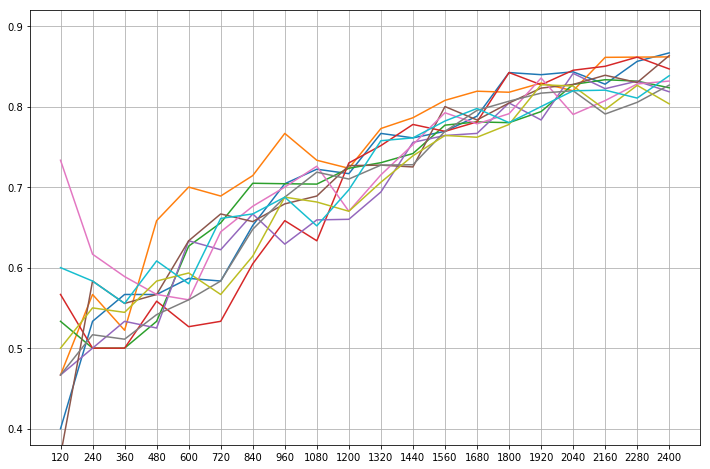

In [4]:
# 提案方法の精度推移の可視化
xlist = list(range(1,21))
ylists = proposal_accs

fig2 = plt.figure(figsize=(12,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.plot(xlist, ylists[5], color="tab:brown")
plt.plot(xlist, ylists[6], color="tab:pink")
plt.plot(xlist, ylists[7], color="tab:gray")
plt.plot(xlist, ylists[8], color="tab:olive")
plt.plot(xlist, ylists[9], color="tab:cyan")
plt.grid(True)

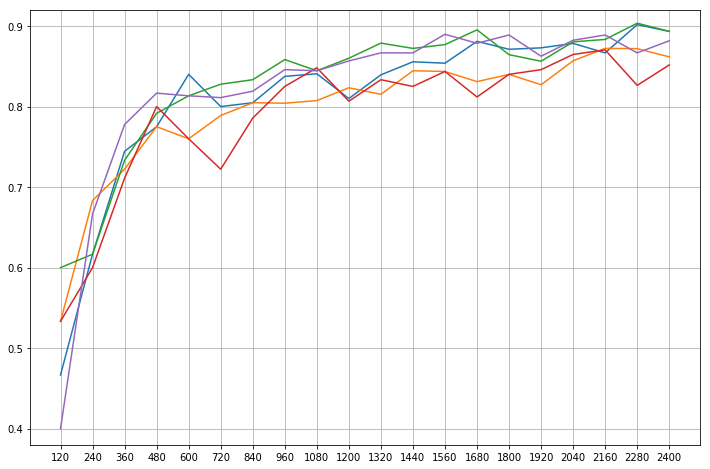

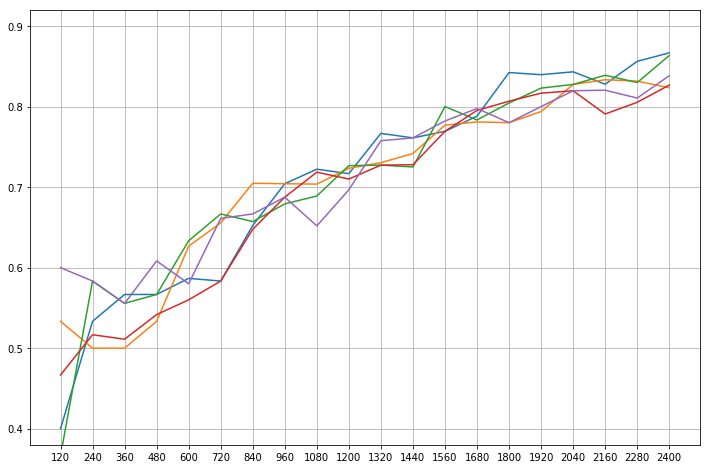

In [5]:
# 従来方法の精度推移の可視化
xlist = list(range(1,21))
ylists = conventional_accs

fig1 = plt.figure(figsize=(12,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.grid(True)

# 提案方法の精度推移の可視化
xlist = list(range(1,21))
ylists = proposal_accs

fig2 = plt.figure(figsize=(12,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[2], color="tab:orange")
plt.plot(xlist, ylists[5], color="tab:green")
plt.plot(xlist, ylists[7], color="tab:red")
plt.plot(xlist, ylists[9], color="tab:purple")
plt.grid(True)

In [27]:
# 提案方法の精度推移の平均値の算出

import numpy as np

ylists = proposal_accs
indexes = [0,2,5,7,9]
avg_ylist = np.array([0.0 for i in range(20)])

for i in indexes:
    avg_ylist += np.array(ylists[i])
avg_ylist = avg_ylist / len(indexes)

In [28]:
# y=ax + b の近似直線のa, bを算出

def reg1dim(x, y):
    n = len(x)
    a = ((np.dot(x, y)- y.sum() * x.sum()/n)/
        ((x ** 2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum())/n
    return a, b

xs = np.array(list(range(120, 120*20+1, 120)))
ys = avg_ylist

a, b = reg1dim(xs, ys)

approx_ylist = [x*a+b for x in xs]

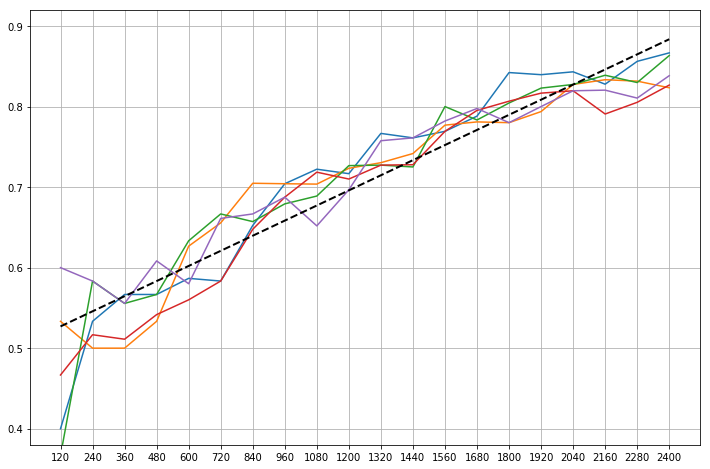

In [40]:
# 提案方法の精度推移の可視化
xlist = list(range(1,21))
ylists = proposal_accs

fig2 = plt.figure(figsize=(12,8))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[2], color="tab:orange")
plt.plot(xlist, ylists[5], color="tab:green")
plt.plot(xlist, ylists[7], color="tab:red")
plt.plot(xlist, ylists[9], color="tab:purple")
plt.plot(xlist, approx_ylist, color="black", linewidth=2, linestyle="dashed")
plt.grid(True)

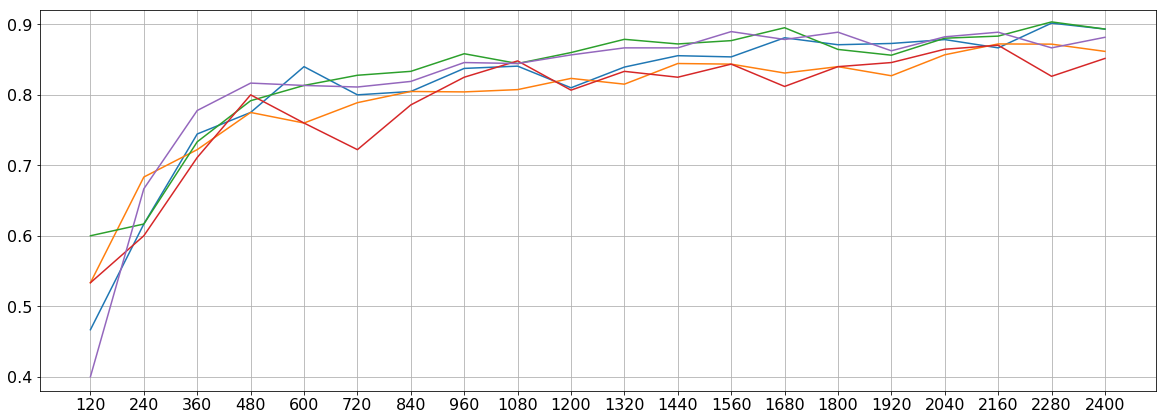

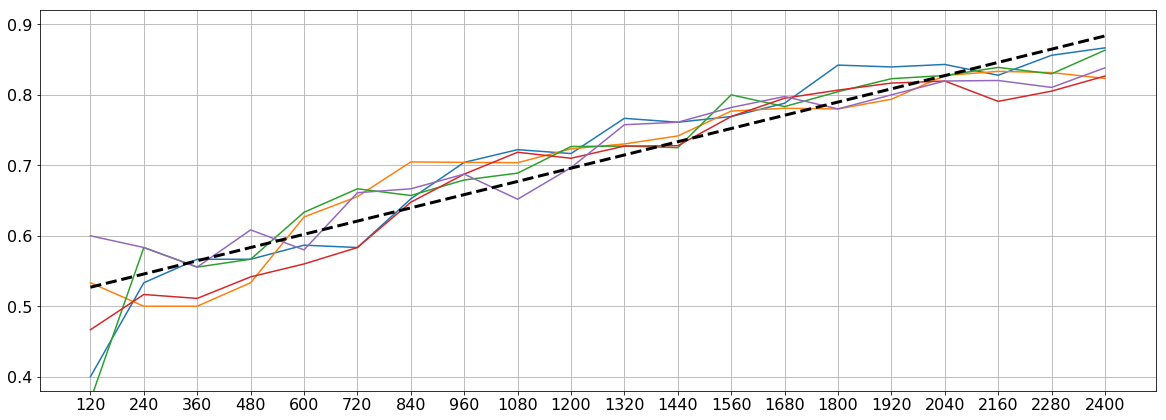

In [33]:
# 従来方法の精度推移の可視化
xlist = list(range(1,21))
ylists = conventional_accs

fig1 = plt.figure(figsize=(20,7))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)), fontsize=16)
plt.yticks(fontsize=16)
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.grid(True)

# 提案方法の精度推移の可視化
xlist = list(range(1,21))
ylists = proposal_accs

fig2 = plt.figure(figsize=(20,7))
plt.ylim(0.38, 0.92)
plt.xticks(xlist, list(range(120, 120*20+1, 120)), fontsize=16)
plt.yticks(fontsize=16)
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[2], color="tab:orange")
plt.plot(xlist, ylists[5], color="tab:green")
plt.plot(xlist, ylists[7], color="tab:red")
plt.plot(xlist, ylists[9], color="tab:purple")
plt.plot(xlist, approx_ylist, color="black", linewidth=3, linestyle="dashed")
plt.grid(True)

In [45]:
### 精度の推移の傾きから, 精度を見積もる
print("精度の推移の傾き:  y = {0}x + {1}".format(a, b))
print("学習データ数が {0} 増えると, 精度が {1} %上がると見積もれる".format(120, round(a*120 ,2)*100))

精度の推移の傾き:  y = 0.00015639884532105895x + 0.5082360524036222
学習データ数が 120 増えると, 精度が 2.0 %上がると見積もれる


### 収束速度の推移

In [2]:
# 従来方法の収束速度の読み込み
eval_list = ["eval" + str(i) for i in range(4, 9)]
model_list = ["v" + str(i) for i in range(1, 21)]
conv_train_err_speeds = []
conv_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../conventional/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    conv_train_err_speeds.append(train_err_speeds)
    conv_test_err_speeds.append(test_err_speeds)

In [3]:
# 提案方法の収束速度の読み込み
eval_list =  ["eval5", "eval6", "eval7", "eval8", "eval9", "eval12", "eval13", "eval14", "eval15", "eval16"]
model_list = ["v" + str(i) for i in range(1, 21)]
prop_train_err_speeds = []
prop_test_err_speeds = []

for eval_v in eval_list:
    train_err_speeds = []
    test_err_speeds = []
    for model_v in model_list:
        path = os.path.join("../proposal/eval/result", eval_v, model_v, "err_speed.json")
        with open(path) as f:
            log = json.load(f)
        train_err_speeds.append(log["train_err_speed"])
        test_err_speeds.append(log["test_err_speed"])
    prop_train_err_speeds.append(train_err_speeds)
    prop_test_err_speeds.append(test_err_speeds)

In [4]:
# ymaxとyminの算出
def cal_range(lists1, lists2):
    ymax = lists1[0][0]
    ymin = lists1[0][0]
    
    for list1, list2 in zip(lists1, lists2):
        list_max = max([max(list1), max(list2)])
        if ymax < list_max :
            ymax = list_max
        list_min = min([min(list1), min(list2)])
        if ymin > list_min:
            ymin = list_min
            
    return ymax + 5, ymin - 5

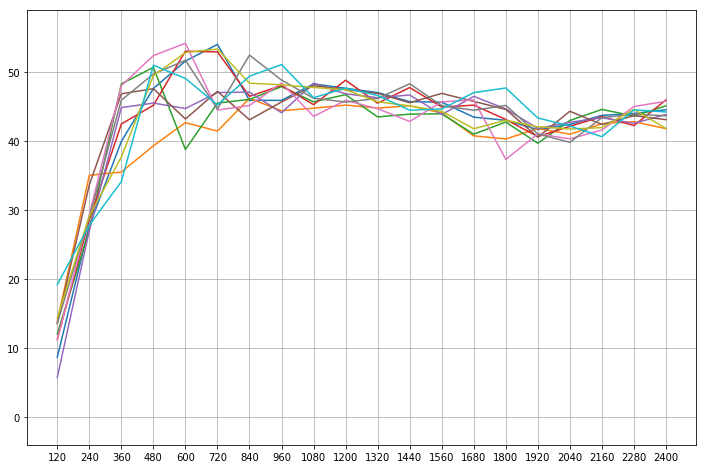

In [26]:
# 提案方法
xlist = list(range(1,21))
ylists = prop_train_err_speeds

fig2 = plt.figure(figsize=(12,8))
plt.ylim(ymin, ymax)
plt.xticks(xlist, list(range(120, 120*20+1, 120)))
plt.plot(xlist, ylists[0], color="tab:blue")
plt.plot(xlist, ylists[1], color="tab:orange")
plt.plot(xlist, ylists[2], color="tab:green")
plt.plot(xlist, ylists[3], color="tab:red")
plt.plot(xlist, ylists[4], color="tab:purple")
plt.plot(xlist, ylists[5], color="tab:brown")
plt.plot(xlist, ylists[6], color="tab:pink")
plt.plot(xlist, ylists[7], color="tab:gray")
plt.plot(xlist, ylists[8], color="tab:olive")
plt.plot(xlist, ylists[9], color="tab:cyan")
plt.grid(True)

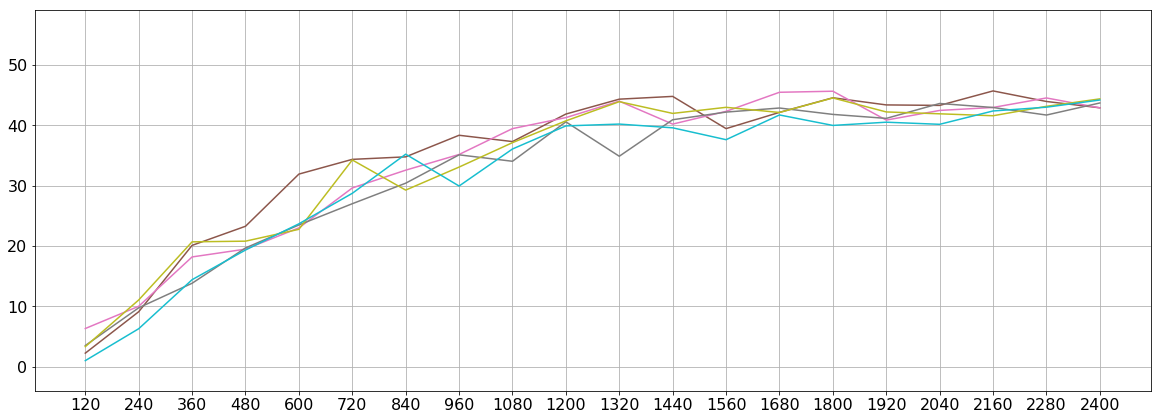

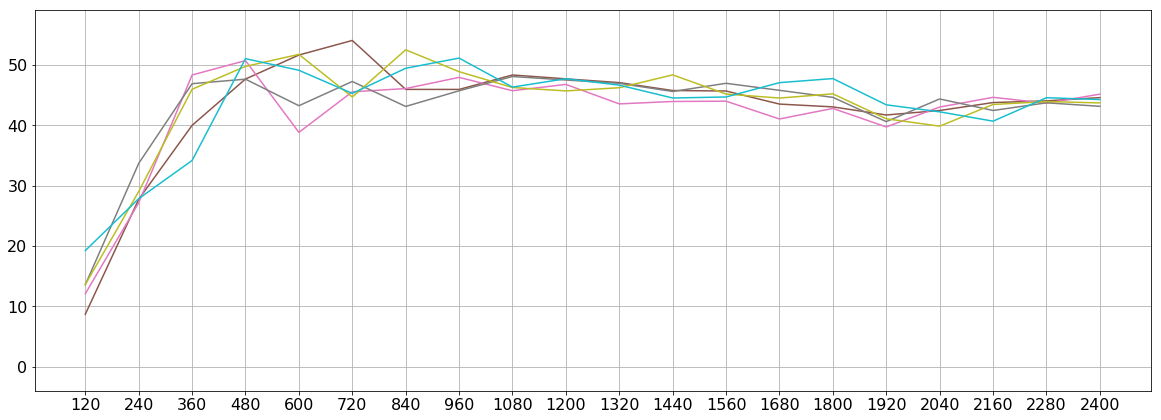

In [15]:
# 訓練誤差収束速度の推移の可視化

ymax, ymin = cal_range(conv_train_err_speeds, prop_train_err_speeds)

# 従来方法
xlist = list(range(1,21))
ylists = conv_train_err_speeds

fig1 = plt.figure(figsize=(20,7))
plt.ylim(ymin, ymax)
plt.xticks(xlist, list(range(120, 120*20+1, 120)), fontsize=16)
plt.yticks(fontsize=16)
plt.plot(xlist, ylists[0], color="tab:brown")
plt.plot(xlist, ylists[1], color="tab:pink")
plt.plot(xlist, ylists[2], color="tab:gray")
plt.plot(xlist, ylists[3], color="tab:olive")
plt.plot(xlist, ylists[4], color="tab:cyan")
plt.grid(True)

# 提案方法
xlist = list(range(1,21))
ylists = prop_train_err_speeds

fig2 = plt.figure(figsize=(20,7))
plt.ylim(ymin, ymax)
plt.xticks(xlist, list(range(120, 120*20+1, 120)), fontsize=16)
plt.yticks(fontsize=16)
plt.plot(xlist, ylists[0], color="tab:brown")
plt.plot(xlist, ylists[2], color="tab:pink")
plt.plot(xlist, ylists[5], color="tab:gray")
plt.plot(xlist, ylists[7], color="tab:olive")
plt.plot(xlist, ylists[9], color="tab:cyan")
plt.grid(True)

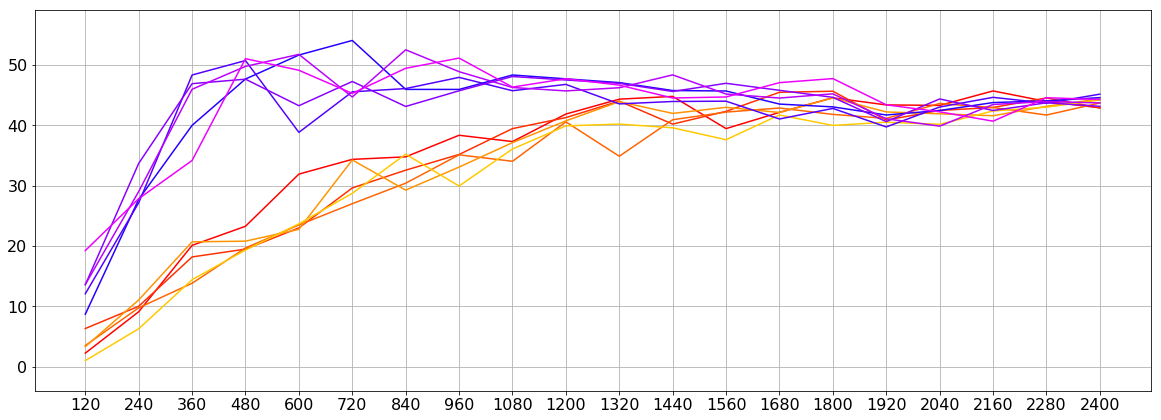

In [24]:
# 訓練誤差収束速度の推移の可視化

import matplotlib.cm as cm

ymax, ymin = cal_range(conv_train_err_speeds, prop_train_err_speeds)

# 従来方法
xlist = list(range(1,21))

fig1 = plt.figure(figsize=(20,7))
plt.ylim(ymin, ymax)
plt.xticks(xlist, list(range(120, 120*20+1, 120)), fontsize=16)
plt.yticks(fontsize=16)

ylists = conv_train_err_speeds
plt.plot(xlist, ylists[0], color=cm.hsv(0/30.0))
plt.plot(xlist, ylists[1], color=cm.hsv(1/30.0))
plt.plot(xlist, ylists[2], color=cm.hsv(2/30.0))
plt.plot(xlist, ylists[3], color=cm.hsv(3/30.0))
plt.plot(xlist, ylists[4], color=cm.hsv(4/30.0))

ylists = prop_train_err_speeds
plt.plot(xlist, ylists[0], color=cm.hsv(21/30.0))
plt.plot(xlist, ylists[2], color=cm.hsv(22/30.0))
plt.plot(xlist, ylists[5], color=cm.hsv(23/30.0))
plt.plot(xlist, ylists[7], color=cm.hsv(24/30.0))
plt.plot(xlist, ylists[9], color=cm.hsv(25/30.0))

plt.grid(True)